In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
import warnings
import os

warnings.filterwarnings("ignore")

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [2]:
print("\n" + "="*70)
print("📥 LOADING DATASETS")
print("="*70)

dataset2_path = "../../data/preprocessed/resources_and_human_capital_dataset.csv"
dataset2 = pd.read_csv(dataset2_path)
print(f"\n📊 Dataset 2: Resources and Human Capital")
print(f"   Shape: {dataset2.shape}")
print(f"   Countries: {dataset2.shape[0]}")
print(f"   Indicators: {dataset2.shape[1] - 1}")

print("\n✅ dataset loaded successfully")


📥 LOADING DATASETS

📊 Dataset 2: Resources and Human Capital
   Shape: (232, 86)
   Countries: 232
   Indicators: 85

✅ dataset loaded successfully


In [3]:
print("\n" + "="*70)
print("\n📊 DATASET 2: Resources and Human Capital")
print("-" * 70)
print("\nFirst few rows:")
display(dataset2.head())

print("\nData types:")
print(dataset2.dtypes.value_counts())

print("\nBasic statistics:")
display(dataset2.describe())



📊 DATASET 2: Resources and Human Capital
----------------------------------------------------------------------

First few rows:


,Country,Population_millions_2024,Surface area_sq. km thousands_2024,Population density_people per sq. km_2024,Rural_Env_Rural population_2022,Rural_Env_Rural population growth (annual %)_2022,Rural_Env_Land area (sq. km)_2021,Rural_Env_Forest area (% of land area)_2021,Rural_Env_Permanent cropland (% of land area)_2021,Rural_Env_Arable land (% of land area)_2021,Rural_Env_Arable land (hectares per person)_2021,Agri_Inputs_Agricultural land_% of land area_2021,Agri_Inputs_Agricultural land_% irrigated_2021,Agri_Inputs_Average annual precipitation_millimeters_2020,Agri_Inputs_Land under cereal production_hectares thousands_2021,Agri_Inputs_Fertilizer consumption_% of fertilizer production_2021,Agri_Inputs_Fertilizer consumption_kilograms per hectare of arable land_2021,Agri_Inputs_Agricultural employment_% of total employment_2020,Forest_Bio_Forest area_sq. km thousands_1990,Forest_Bio_Forest area_sq. km thousands_2021,Forest_Bio_Threatened species_Mammals_2018,Forest_Bio_Threatened species_Birds_2018,Forest_Bio_Threatened species_Fishes_2018,Forest_Bio_Threatened species_Higher plants_2018,Forest_Bio_Terrestrial protected areas_% of total land area_2022,Forest_Bio_Marine protected areas_% of territorial waters_2022,Energy_Energy production_Total_million metric tons of oil equivalent_1990,Energy_Energy production_Total_million metric tons of oil equivalent_2015,Energy_Energy use_Total_million metric tons of oil equivalent_1990,Energy_Energy use_Total_million metric tons of oil equivalent_2015,Energy_Energy use_per capita_kilograms of oil equivalent_1990,Energy_Energy use_per capita_kilograms of oil equivalent_2015,Energy_Energy use_Fossil fuel_% of total energy use_1990,Energy_Energy use_Fossil fuel_% of total energy use_2015,Energy_Energy use_Combustible renewable and waste_% of total energy use_1990,Energy_Energy use_Combustible renewable and waste_% of total energy use_2015,Energy_Energy use_Alternative and nuclear energy_% of total energy use_1990,Energy_Energy use_Alternative and nuclear energy_% of total energy use_2015,Energy_Energy use growth (%)_1990-2014,NatResource_GDP_Total natural resources rents_% of GDP_2021,NatResource_GDP_Oil rents_% of GDP_2021,NatResource_GDP_Natural gas rents_% of GDP_2021,NatResource_GDP_Coal rents_% of GDP_2021,NatResource_GDP_Mineral rents_% of GDP_2021,NatResource_GDP_Forest rents_% of GDP_2021,Population_Population_millions_2000,Population_Population_millions_2024,Population_Average annual population growth %_2000-2024,Population_Population age composition_Ages 0-14_%_2024,Population_Population age composition_Ages 15-64_%_2024,Population_Population age composition_Ages 65+_%_2024,Population_Dependency ratio_young_% of working-age population_2024,Population_Dependency ratio_old_% of working-age population_2024,"Population_Crude death rate_per 1,000 people_2023","Population_Crude birth rate_per 1,000 people_2023",Labor_Labor force participation rate_Male_% ages 15 and older_2015,Labor_Labor force participation rate_Male_% ages 15 and older_2021,Labor_Labor force participation rate_Female_% ages 15 and older_2015,Labor_Labor force participation rate_Female_% ages 15 and older_2015-21,Labor_Labor force (ages 15 and older)_Total_millions_2015,Labor_Labor force (ages 15 and older)_Total_millions_2021,Labor_Labor force (ages 15 and older)_Female_% of labor force_2015,Labor_Labor force (ages 15 and older)_Female_% of labor force_2021,Labor_Labor force growth (%)_2015-21,Edu_Participation_Gross enrollment ratio_Preprimary_% of relevant age group_2015,Edu_Participation_Gross enrollment ratio_Preprimary_% of relevant age group_2022,Edu_Participation_Gross enrollment ratio_Primary_% of relevant age group_2015,Edu_Participation_Gross enrollment ratio_Primary_% of relevant age group_2022,Edu_Participation_Gross enrollment ratio_Secondary_% of relevant age group_2015,Edu_Participation_Gross enrollment ratio_Secondary_% of relevant age group_2022,Edu_Participation_Gross enrollment ratio_Tertiary_% of 


Data types:
float64    85
object      1
Name: count, dtype: int64

Basic statistics:


,Population_millions_2024,Surface area_sq. km thousands_2024,Population density_people per sq. km_2024,Rural_Env_Rural population_2022,Rural_Env_Rural population growth (annual %)_2022,Rural_Env_Land area (sq. km)_2021,Rural_Env_Forest area (% of land area)_2021,Rural_Env_Permanent cropland (% of land area)_2021,Rural_Env_Arable land (% of land area)_2021,Rural_Env_Arable land (hectares per person)_2021,Agri_Inputs_Agricultural land_% of land area_2021,Agri_Inputs_Agricultural land_% irrigated_2021,Agri_Inputs_Average annual precipitation_millimeters_2020,Agri_Inputs_Land under cereal production_hectares thousands_2021,Agri_Inputs_Fertilizer consumption_% of fertilizer production_2021,Agri_Inputs_Fertilizer consumption_kilograms per hectare of arable land_2021,Agri_Inputs_Agricultural employment_% of total employment_2020,Forest_Bio_Forest area_sq. km thousands_1990,Forest_Bio_Forest area_sq. km thousands_2021,Forest_Bio_Threatened species_Mammals_2018,Forest_Bio_Threatened species_Birds_2018,Forest_Bio_Threatened species_Fishes_2018,Forest_Bio_Threatened species_Higher plants_2018,Forest_Bio_Terrestrial protected areas_% of total land area_2022,Forest_Bio_Marine protected areas_% of territorial waters_2022,Energy_Energy production_Total_million metric tons of oil equivalent_1990,Energy_Energy production_Total_million metric tons of oil equivalent_2015,Energy_Energy use_Total_million metric tons of oil equivalent_1990,Energy_Energy use_Total_million metric tons of oil equivalent_2015,Energy_Energy use_per capita_kilograms of oil equivalent_1990,Energy_Energy use_per capita_kilograms of oil equivalent_2015,Energy_Energy use_Fossil fuel_% of total energy use_1990,Energy_Energy use_Fossil fuel_% of total energy use_2015,Energy_Energy use_Combustible renewable and waste_% of total energy use_1990,Energy_Energy use_Combustible renewable and waste_% of total energy use_2015,Energy_Energy use_Alternative and nuclear energy_% of total energy use_1990,Energy_Energy use_Alternative and nuclear energy_% of total energy use_2015,Energy_Energy use growth (%)_1990-2014,NatResource_GDP_Total natural resources rents_% of GDP_2021,NatResource_GDP_Oil rents_% of GDP_2021,NatResource_GDP_Natural gas rents_% of GDP_2021,NatResource_GDP_Coal rents_% of GDP_2021,NatResource_GDP_Mineral rents_% of GDP_2021,NatResource_GDP_Forest rents_% of GDP_2021,Population_Population_millions_2000,Population_Population_millions_2024,Population_Average annual population growth %_2000-2024,Population_Population age composition_Ages 0-14_%_2024,Population_Population age composition_Ages 15-64_%_2024,Population_Population age composition_Ages 65+_%_2024,Population_Dependency ratio_young_% of working-age population_2024,Population_Dependency ratio_old_% of working-age population_2024,"Population_Crude death rate_per 1,000 people_2023","Population_Crude birth rate_per 1,000 people_2023",Labor_Labor force participation rate_Male_% ages 15 and older_2015,Labor_Labor force participation rate_Male_% ages 15 and older_2021,Labor_Labor force participation rate_Female_% ages 15 and older_2015,Labor_Labor force participation rate_Female_% ages 15 and older_2015-21,Labor_Labor force (ages 15 and older)_Total_millions_2015,Labor_Labor force (ages 15 and older)_Total_millions_2021,Labor_Labor force (ages 15 and older)_Female_% of labor force_2015,Labor_Labor force (ages 15 and older)_Female_% of labor force_2021,Labor_Labor force growth (%)_2015-21,Edu_Participation_Gross enrollment ratio_Preprimary_% of relevant age group_2015,Edu_Participation_Gross enrollment ratio_Preprimary_% of relevant age group_2022,Edu_Participation_Gross enrollment ratio_Primary_% of relevant age group_2015,Edu_Participation_Gross enrollment ratio_Primary_% of relevant age group_2022,Edu_Participation_Gross enrollment ratio_Secondary_% of relevant age group_2015,Edu_Participation_Gross enrollment ratio_Secondary_% of relevant age group_2022,Edu_Participation_Gross enrollment ratio_Tertiary_% of relevant

In [4]:
print("\n" + "="*70)
print("🔍 MISSING VALUES ANALYSIS - DATASET 2")
print("="*70)

# Calculate missing values
missing_data2 = pd.DataFrame({
    'Column': dataset2.columns,
    'Missing_Count': dataset2.isnull().sum(),
    'Missing_Percentage': (dataset2.isnull().sum() / len(dataset2) * 100).round(2)
})

# Sort by missing percentage
missing_data2 = missing_data2.sort_values('Missing_Percentage', ascending=False)

# Display columns with missing values
missing_with_values2 = missing_data2[missing_data2['Missing_Count'] > 0]

print(f"\n📊 Total columns: {len(dataset2.columns)}")
print(f"📊 Columns with missing values: {len(missing_with_values2)}")
print(f"📊 Columns without missing values: {len(dataset2.columns) - len(missing_with_values2)}")

if len(missing_with_values2) > 0:
    print(f"\n⚠️ Columns with missing values (showing top 20):")
    display(missing_with_values2.head(20))
else:
    print("\n✅ No missing values found!")

# Overall missing percentage
total_cells2 = dataset2.shape[0] * dataset2.shape[1]
total_missing2 = dataset2.isnull().sum().sum()
overall_missing_pct2 = (total_missing2 / total_cells2 * 100).round(2)

print(f"\n📊 Overall missing data percentage: {overall_missing_pct2}%")
print(f"   Total cells: {total_cells2:,}")
print(f"   Missing cells: {total_missing2:,}")


🔍 MISSING VALUES ANALYSIS - DATASET 2

📊 Total columns: 86
📊 Columns with missing values: 85
📊 Columns without missing values: 1

⚠️ Columns with missing values (showing top 20):


,Column,Missing_Count,Missing_Percentage
Edu_Completion_Students at lowest proficiency on PISA_Mathematics_% of 15 year-olds_2018,Edu_Completion_Students at lowest proficiency ...,152,65.52
Edu_Completion_Students at lowest proficiency on PISA_Science_% of 15 year-olds_2018,Edu_Completion_Students at lowest proficiency ...,152,65.52
Agri_Inputs_Fertilizer consumption_% of fertilizer production_2021,Agri_Inputs_Fertilizer consumption_% of fertil...,136,58.62
Agri_Inputs_Agricultural land_% irrigated_2021,Agri_Inputs_Agricultural land_% irrigated_2021,132,56.90
Edu_Completion_Adult literacy rate_Male_% ages 15 and older_2016-23,Edu_Completion_Adult literacy rate_Male_% ages...,105,45.26
Edu_Completion_Adult literacy rate_Female_% ages 15 and older_2016-23,Edu_Completion_Adult literacy rate_Female_% ag...,98,42.24
Edu_Completion_Youth literacy rate_Male_% of ages 15-24_2016-23,Edu_Completion_Youth literacy rate_Male_% of a...,97,41.81
Energy_Energy production_Total_million metric tons of oil equivalent_1990,Energy_Energy production_Total_million metric ...,94,40.52
Edu_Completion_Youth literacy rate_Female_% of ages 15-24_2016-23,Edu_Completion_Youth literacy rate_Female_% of...,94,40.52
Energy_Energy production_Total_million metric tons of oil equivalent_2015,Energy_Energy production_Total_million metric ...,88,37.93



📊 Overall missing data percentage: 18.37%
   Total cells: 19,952
   Missing cells: 3,666



📊 Creating missing values visualization for Dataset 2...
✅ Saved: ../../outputs/clean_human_natural_capital_development_indicators_missing_values.png


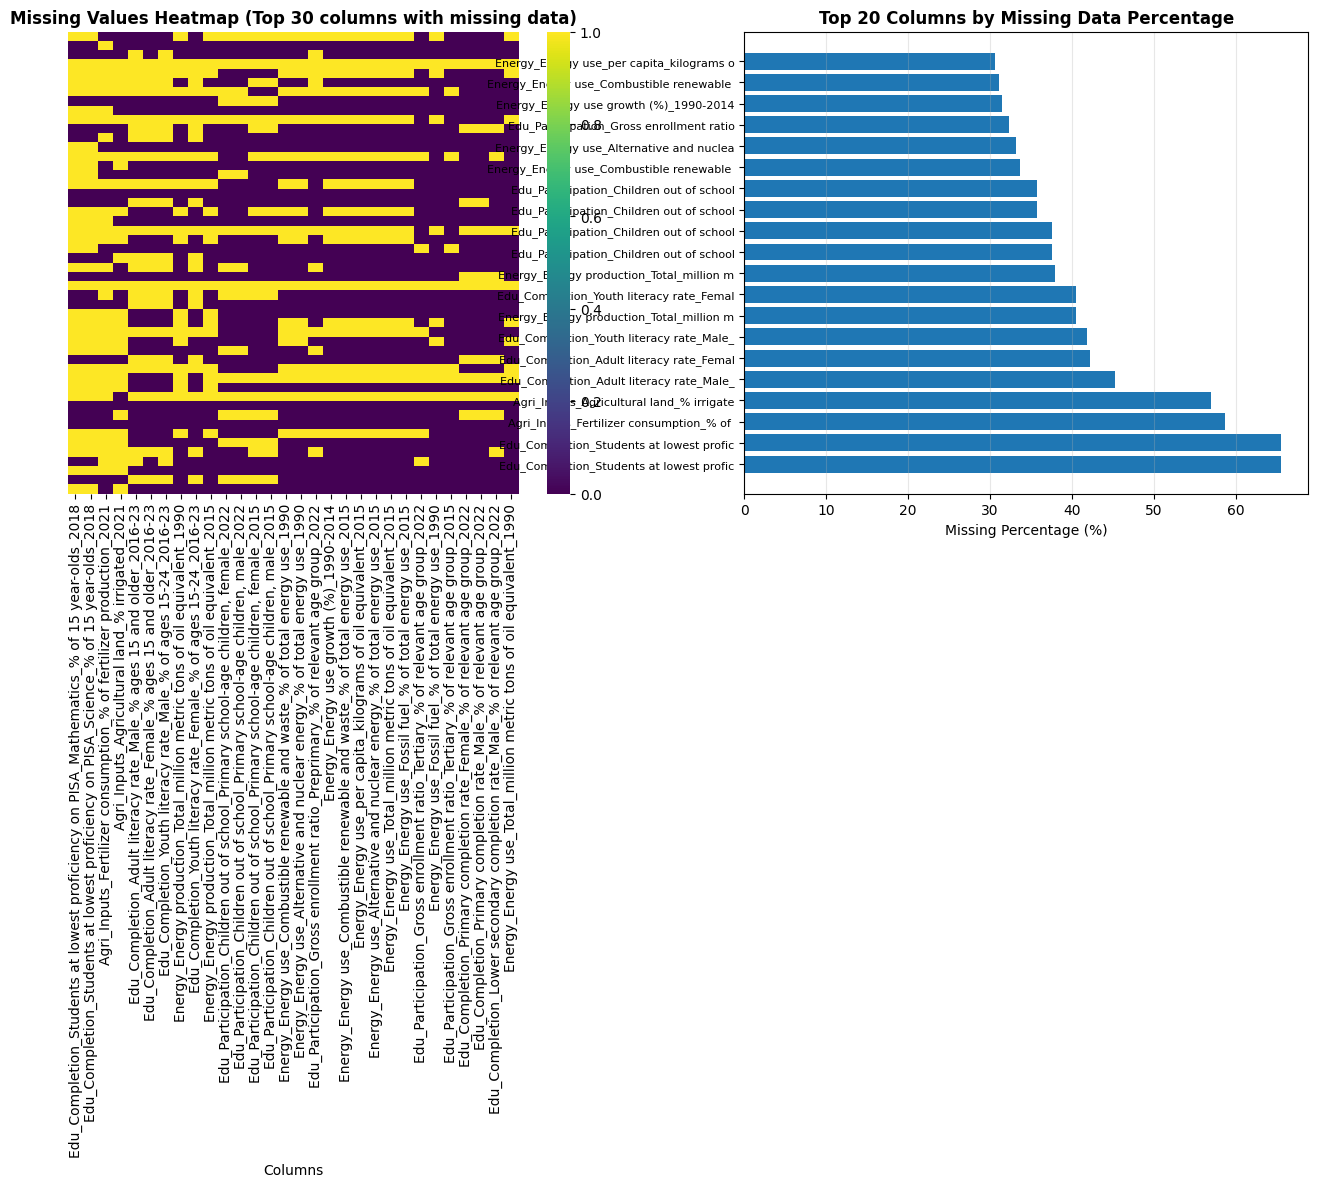

In [6]:
print("\n📊 Creating missing values visualization for Dataset 2...")

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Missing values heatmap
ax1 = axes[0]
top_missing_cols2 = missing_with_values2.head(30)['Column'].tolist()
if len(top_missing_cols2) > 0:
    sample_data2 = dataset2[top_missing_cols2].head(50)
    sns.heatmap(sample_data2.isnull(), cbar=True, cmap='viridis', 
                yticklabels=False, ax=ax1)
    ax1.set_title('Missing Values Heatmap (Top 30 columns with missing data)', 
                  fontsize=12, fontweight='bold')
    ax1.set_xlabel('Columns')
else:
    ax1.text(0.5, 0.5, 'No Missing Values', 
             ha='center', va='center', fontsize=16)
    ax1.set_title('Missing Values Heatmap')

# Plot 2: Bar chart
ax2 = axes[1]
if len(missing_with_values2) > 0:
    top_20_missing2 = missing_with_values2.head(20)
    ax2.barh(range(len(top_20_missing2)), top_20_missing2['Missing_Percentage'])
    ax2.set_yticks(range(len(top_20_missing2)))
    ax2.set_yticklabels([col[:40] for col in top_20_missing2['Column']], fontsize=8)
    ax2.set_xlabel('Missing Percentage (%)')
    ax2.set_title('Top 20 Columns by Missing Data Percentage', 
                  fontsize=12, fontweight='bold')
    ax2.grid(axis='x', alpha=0.3)
else:
    ax2.text(0.5, 0.5, 'No Missing Values', 
             ha='center', va='center', fontsize=16)
    ax2.set_title('Missing Data by Column')

plt.tight_layout()
plt.savefig('../../outputs/clean_human_natural_capital_development_indicators_missing_values.png', dpi=300, bbox_inches='tight')
print("✅ Saved: ../../outputs/clean_human_natural_capital_development_indicators_missing_values.png")
plt.show()

In [9]:
print("\n" + "="*70)
print("🔧 HANDLING MISSING VALUES - DATASET 2")
print("="*70)

# Create a copy for cleaning
dataset2_cleaned = dataset2.copy()
# Step 1: Remove columns with >80% missing data
missing_threshold = 80
cols_to_drop = missing_data2[missing_data2['Missing_Percentage'] > missing_threshold]['Column'].tolist()

print("\n📋 Strategy:")
print("   1. Remove columns with >80% missing data")
print("   2. Remove rows where Country is missing")
print("   3. Impute remaining missing values with median")

# Step 1: Remove columns with >80% missing data
cols_to_drop2 = missing_data2[missing_data2['Missing_Percentage'] > missing_threshold]['Column'].tolist()

if 'Country' in cols_to_drop2:
    cols_to_drop2.remove('Country')

print(f"\n🗑️ Removing {len(cols_to_drop2)} columns with >{missing_threshold}% missing data:")
if len(cols_to_drop2) > 0:
    for col in cols_to_drop2[:10]:
        pct = missing_data2[missing_data2['Column'] == col]['Missing_Percentage'].values[0]
        print(f"   • {col[:60]}... ({pct}% missing)")
    if len(cols_to_drop2) > 10:
        print(f"   ... and {len(cols_to_drop2) - 10} more columns")
    
    dataset2_cleaned = dataset2_cleaned.drop(columns=cols_to_drop2)
    print(f"   ✅ Dropped {len(cols_to_drop2)} columns")
else:
    print("   ✅ No columns exceed threshold")

# Step 2: Remove rows with missing Country
before_rows2 = len(dataset2_cleaned)
dataset2_cleaned = dataset2_cleaned[dataset2_cleaned['Country'].notna()]
dataset2_cleaned = dataset2_cleaned[dataset2_cleaned['Country'] != 'nan']
after_rows2 = len(dataset2_cleaned)
removed_rows2 = before_rows2 - after_rows2

if removed_rows2 > 0:
    print(f"\n🗑️ Removed {removed_rows2} rows with missing Country")
else:
    print(f"\n✅ No rows with missing Country")

# Step 3: Impute remaining missing values with median
print(f"\n🔧 Imputing remaining missing values with median...")

# Separate Country column
country_col2 = dataset2_cleaned['Country'].copy()
numeric_cols2 = dataset2_cleaned.select_dtypes(include=[np.number]).columns

# Impute numeric columns
imputer2 = SimpleImputer(strategy='median')
dataset2_cleaned[numeric_cols2] = imputer2.fit_transform(dataset2_cleaned[numeric_cols2])

print(f"   ✅ Imputed missing values in {len(numeric_cols2)} numeric columns")

# Check remaining missing values
remaining_missing2 = dataset2_cleaned.isnull().sum().sum()
print(f"\n📊 Remaining missing values: {remaining_missing2}")

print(f"\n✅ Dataset 2 cleaning completed!")
print(f"   Original shape: {dataset2.shape}")
print(f"   Cleaned shape: {dataset2_cleaned.shape}")
print(f"   Rows removed: {dataset2.shape[0] - dataset2_cleaned.shape[0]}")
print(f"   Columns removed: {dataset2.shape[1] - dataset2_cleaned.shape[1]}")


🔧 HANDLING MISSING VALUES - DATASET 2

📋 Strategy:
   1. Remove columns with >80% missing data
   2. Remove rows where Country is missing
   3. Impute remaining missing values with median

🗑️ Removing 0 columns with >80% missing data:
   ✅ No columns exceed threshold

✅ No rows with missing Country

🔧 Imputing remaining missing values with median...
   ✅ Imputed missing values in 85 numeric columns

📊 Remaining missing values: 0

✅ Dataset 2 cleaning completed!
   Original shape: (232, 86)
   Cleaned shape: (232, 86)
   Rows removed: 0
   Columns removed: 0


In [10]:
print("\n" + "="*70)
print("🔧 HANDLING MISSING VALUES - DATASET 2")
print("="*70)

# Create a copy for cleaning
dataset2_cleaned = dataset2.copy()

print("\n📋 Strategy:")
print("   1. Remove columns with >80% missing data")
print("   2. Remove rows where Country is missing")
print("   3. Impute remaining missing values with median")

# Step 1: Remove columns with >80% missing data
cols_to_drop2 = missing_data2[missing_data2['Missing_Percentage'] > missing_threshold]['Column'].tolist()

if 'Country' in cols_to_drop2:
    cols_to_drop2.remove('Country')

print(f"\n🗑️ Removing {len(cols_to_drop2)} columns with >{missing_threshold}% missing data:")
if len(cols_to_drop2) > 0:
    for col in cols_to_drop2[:10]:
        pct = missing_data2[missing_data2['Column'] == col]['Missing_Percentage'].values[0]
        print(f"   • {col[:60]}... ({pct}% missing)")
    if len(cols_to_drop2) > 10:
        print(f"   ... and {len(cols_to_drop2) - 10} more columns")
    
    dataset2_cleaned = dataset2_cleaned.drop(columns=cols_to_drop2)
    print(f"   ✅ Dropped {len(cols_to_drop2)} columns")
else:
    print("   ✅ No columns exceed threshold")

# Step 2: Remove rows with missing Country
before_rows2 = len(dataset2_cleaned)
dataset2_cleaned = dataset2_cleaned[dataset2_cleaned['Country'].notna()]
dataset2_cleaned = dataset2_cleaned[dataset2_cleaned['Country'] != 'nan']
after_rows2 = len(dataset2_cleaned)
removed_rows2 = before_rows2 - after_rows2

if removed_rows2 > 0:
    print(f"\n🗑️ Removed {removed_rows2} rows with missing Country")
else:
    print(f"\n✅ No rows with missing Country")

# Step 3: Impute remaining missing values with median
print(f"\n🔧 Imputing remaining missing values with median...")

# Separate Country column
country_col2 = dataset2_cleaned['Country'].copy()
numeric_cols2 = dataset2_cleaned.select_dtypes(include=[np.number]).columns

# Impute numeric columns
imputer2 = SimpleImputer(strategy='median')
dataset2_cleaned[numeric_cols2] = imputer2.fit_transform(dataset2_cleaned[numeric_cols2])

print(f"   ✅ Imputed missing values in {len(numeric_cols2)} numeric columns")

# Check remaining missing values
remaining_missing2 = dataset2_cleaned.isnull().sum().sum()
print(f"\n📊 Remaining missing values: {remaining_missing2}")

print(f"\n✅ Dataset 2 cleaning completed!")
print(f"   Original shape: {dataset2.shape}")
print(f"   Cleaned shape: {dataset2_cleaned.shape}")
print(f"   Rows removed: {dataset2.shape[0] - dataset2_cleaned.shape[0]}")
print(f"   Columns removed: {dataset2.shape[1] - dataset2_cleaned.shape[1]}")


🔧 HANDLING MISSING VALUES - DATASET 2

📋 Strategy:
   1. Remove columns with >80% missing data
   2. Remove rows where Country is missing
   3. Impute remaining missing values with median

🗑️ Removing 0 columns with >80% missing data:
   ✅ No columns exceed threshold

✅ No rows with missing Country

🔧 Imputing remaining missing values with median...
   ✅ Imputed missing values in 85 numeric columns

📊 Remaining missing values: 0

✅ Dataset 2 cleaning completed!
   Original shape: (232, 86)
   Cleaned shape: (232, 86)
   Rows removed: 0
   Columns removed: 0


In [11]:
print("\n" + "="*70)
print("📏 STANDARDIZATION & NORMALIZATION - DATASET 2")
print("="*70)

# Create copies for different scaling methods
dataset2_standardized = dataset2_cleaned.copy()
dataset2_normalized = dataset2_cleaned.copy()

# Separate Country column
country_col_d2 = dataset2_cleaned['Country'].copy()
numeric_cols_d2 = dataset2_cleaned.select_dtypes(include=[np.number]).columns

print(f"\n📊 Numeric columns to scale: {len(numeric_cols_d2)}")

# Method 1: Standardization
print(f"\n🔧 Method 1: Standardization (Z-score)")
scaler_standard2 = StandardScaler()
dataset2_standardized[numeric_cols_d2] = scaler_standard2.fit_transform(
    dataset2_cleaned[numeric_cols_d2]
)

print(f"   ✅ Standardization completed")
print(f"   Sample stats after standardization:")
print(f"      Mean: {dataset2_standardized[numeric_cols_d2].mean().mean():.4f}")
print(f"      Std:  {dataset2_standardized[numeric_cols_d2].std().mean():.4f}")

# Method 2: Min-Max Normalization
print(f"\n🔧 Method 2: Min-Max Normalization")
scaler_minmax2 = MinMaxScaler()
dataset2_normalized[numeric_cols_d2] = scaler_minmax2.fit_transform(
    dataset2_cleaned[numeric_cols_d2]
)

print(f"   ✅ Normalization completed")
print(f"   Sample stats after normalization:")
print(f"      Min: {dataset2_normalized[numeric_cols_d2].min().min():.4f}")
print(f"      Max: {dataset2_normalized[numeric_cols_d2].max().max():.4f}")

print(f"\n✅ Dataset 2 scaling completed!")


📏 STANDARDIZATION & NORMALIZATION - DATASET 2

📊 Numeric columns to scale: 85

🔧 Method 1: Standardization (Z-score)
   ✅ Standardization completed
   Sample stats after standardization:
      Mean: 0.0000
      Std:  1.0022

🔧 Method 2: Min-Max Normalization
   ✅ Normalization completed
   Sample stats after normalization:
      Min: 0.0000
      Max: 1.0000

✅ Dataset 2 scaling completed!


In [12]:
print("\n" + "="*70)
print("💾 SAVING CLEANED DATASETS")
print("="*70)

# Create output directory if it doesn't exist
output_dir = "../../data/cleaned"
os.makedirs(output_dir, exist_ok=True)
# Save Dataset 2 versions
print("\n📊 Saving Dataset 2 versions...")

# 1. Cleaned (no scaling)
file2_cleaned = os.path.join(output_dir, "resources_human_capital_cleaned.csv")
dataset2_cleaned.to_csv(file2_cleaned, index=False)
print(f"   ✅ Saved: {file2_cleaned}")
print(f"      Shape: {dataset2_cleaned.shape}")

# 2. Standardized (Z-score)
file2_standardized = os.path.join(output_dir, "resources_human_capital_standardized.csv")
dataset2_standardized.to_csv(file2_standardized, index=False)
print(f"   ✅ Saved: {file2_standardized}")
print(f"      Shape: {dataset2_standardized.shape}")

# 3. Normalized (Min-Max)
file2_normalized = os.path.join(output_dir, "resources_human_capital_normalized.csv")
dataset2_normalized.to_csv(file2_normalized, index=False)
print(f"   ✅ Saved: {file2_normalized}")
print(f"      Shape: {dataset2_normalized.shape}")

print("\n" + "="*70)
print("✅ ALL CLEANING TASKS COMPLETED!")
print("="*70)
print("\n📋 Summary:")
print(f"\n   Dataset 2: Resources & Human Capital")
print(f"      Original:     {dataset2.shape}")
print(f"      Cleaned:      {dataset2_cleaned.shape}")
print(f"      Files saved:  3 versions")
print(f"\n   📁 Total files saved: 6")
print(f"   📁 Location: {output_dir}")


💾 SAVING CLEANED DATASETS

📊 Saving Dataset 2 versions...
   ✅ Saved: ../../data/cleaned/resources_human_capital_cleaned.csv
      Shape: (232, 86)
   ✅ Saved: ../../data/cleaned/resources_human_capital_standardized.csv
      Shape: (232, 86)
   ✅ Saved: ../../data/cleaned/resources_human_capital_normalized.csv
      Shape: (232, 86)

✅ ALL CLEANING TASKS COMPLETED!

📋 Summary:

   Dataset 2: Resources & Human Capital
      Original:     (232, 86)
      Cleaned:      (232, 86)
      Files saved:  3 versions

   📁 Total files saved: 6
   📁 Location: ../../data/cleaned
